# Compte-rendu séance 04

**Travailler avec des fichiers textes**

Pour profiter pleinement de ce notebook, vous devez disposer des fichiers texte au même endroit, et exécuter les cellules de code dans l'ordre du notebook.

## C'est quoi un fichier texte ?

C'est un fichier que vous pouvez ouvrir avec un éditeur de texte et qui est lisible par un _humain_. Les fichiers suivants sont des fichiers textes :

- `index.html` : il s'agit d'un document source au format HTML
- `prog.py` : un code source en langage Python
- `data.json` : format d'enregistrement d'objets informatiques comme les listes, les dictionnaires etc.
- `etudiants.csv` : données en tables

Mais un PDF, une image, un document traitement de texte etc. sont des _binaires_ ; ouverts dans un éditeur de texte, ils seront illisibles. Avec Python nous allons manipuler **uniquement** des fichiers texte.

Pour pouvoir manipuler un fichier texte stocké sur mon disque dur, il nous faut créer un **objet** et avoir une référence sur cette objet. C'est le rôle de la fonction prédéfinie `open`. Ci-dessous un schéma résumant le rôle de `open` :

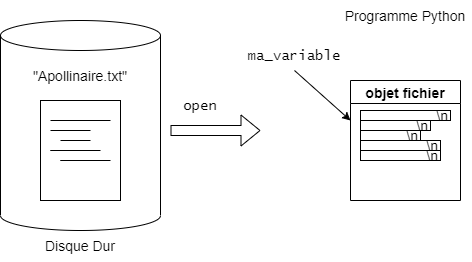

Par exemple, l'instruction ci-dessous créer un objet fichier avec le contenu du fichier texte nommé `Apollinaire.txt` et référencé par la variable `fic` :

In [5]:
fic = open('Apollinaire.txt')

Ce n'est pas important mais voici le type exact de l'_objet fichier_ :

In [2]:
type(fic)

_io.TextIOWrapper

## L'objet fichier est un itérable

Et c'est ça qui est important, cela signifie qu'on peut parcourir l'objet fichier avec une boucle `for`. Les objets distribués par cet itérables sont des `str` : les lignes de texte de mon fichier.

In [3]:
for ligne in fic:
    print(ligne)

Mon aimée adorée avant que je m'en aille

Avant que notre amour triste défaille

Râle et meure ô m'amie une fois

Il faut nous promener tous les deux seuls dans les bois

Alors je m'en irai plus heureux que les rois.



Notez que chaque ligne de texte se termine par un retour à la ligne, le caractère `'\n'`. C'est ce qui explique les lignes blanches dans les affichages ci-dessus. Un fichier ouver doit être refermé, dès qu'on en n'a plus besoin. **Attention** un fichier laissé ouvert occupe de l'espace mémoire inutilement.

In [10]:
fic.close()

On peut (c'est recommandé) utiliser l'instruction `with ... as ...` pour ouvrir le fichier de façon plus propre : en cas de plantage, il sera quand même fermé correctement.

## Autres méthodes pour parcourir un fichier

### la méthode `readline()`

Permet de lire une ligne et fait avancer l'itérable d'un élément :

In [6]:
ligne = fic.readline()

In [7]:
ligne

"Mon aimée adorée avant que je m'en aille\n"

Le deuxième `readline()` ci-dessous permet de récupérer la 2e ligne de texte du fichier ouvert :

In [8]:
fic.readline()

'Avant que notre amour triste défaille\n'

Et si on termine de parcourir l'itérable avec un `for`, ça ne pose pas de problème, mais on commence à la ligne 3, le `for` **ne réinitialise pas l'itérable** !

In [9]:
for ligne in fic:
    print(ligne)

Râle et meure ô m'amie une fois

Il faut nous promener tous les deux seuls dans les bois

Alors je m'en irai plus heureux que les rois.



Associée à une boucle `while`, la méthode `readline()` permet aussi de parcourir toutes les lignes du fichier. Toutefois, on privilégira le `for`. Ci-dessous on ouvre le fichier avec l'instruction à l'intérieur d'une instruction `with` (du coup pas besoin du `close`) :

In [11]:
with open('Apollinaire.txt', 'r', encoding='utf-8') as fic:
    ligne = fic.readline()
    while ligne != '':
        print(ligne)
        ligne = fic.readline()

Mon aimée adorée avant que je m'en aille

Avant que notre amour triste défaille

Râle et meure ô m'amie une fois

Il faut nous promener tous les deux seuls dans les bois

Alors je m'en irai plus heureux que les rois.



### Une méthode pour récupérer toutes les lignes

Avec `readlines()` (avec un s) récupère toutes les lignes du fichier dans une liste. **Attention** a ne faire que si c'est nécessaire et avec un fichier pas trop volumineux.

In [12]:
lignes = []
with open('Apollinaire.txt', 'r', encoding='utf-8') as fic2:
    lignes = fic2.readlines()

In [13]:
lignes

["Mon aimée adorée avant que je m'en aille\n",
 'Avant que notre amour triste défaille\n',
 "Râle et meure ô m'amie une fois\n",
 'Il faut nous promener tous les deux seuls dans les bois\n',
 "Alors je m'en irai plus heureux que les rois.\n"]

## Les autres paramètres de la fonction `open`

La fonction `open` prend d'autres paramètres : le 2e est le mode d'ouverture. Il s'agit d'un carcatère : `'r'` signifie _read only_, on ne peut que lire le contenu, `'w'` signifie_write_, le fichier est créé s'il n'existe pas et nettoyé de son contenu s'il existe déjà et on peut alors écrire dans le fichier à l'aide de la méthode `write` ; le troisième mode est `'a'` (comme _append_) pour pouvoir ajouter du contenu à la suite du contenu déjà présent dans le fichier.

Un troisième paramètre permet de spécifier l'encodage des caractères `encoding` en anglais). Par défaut il s'agit de l'utf-8. **Attention**, ouvrir un fichier en se trompant d'encodage va générer des caractères bizarres :

In [14]:
lignes_latin1 = []
with open('Apollinaire.txt', 'r', encoding='latin1') as fic3:
    lignes_latin1 = fic3.readlines()

In [15]:
lignes_latin1

["Mon aimÃ©e adorÃ©e avant que je m'en aille\n",
 'Avant que notre amour triste dÃ©faille\n',
 "RÃ¢le et meure Ã´ m'amie une fois\n",
 'Il faut nous promener tous les deux seuls dans les bois\n',
 "Alors je m'en irai plus heureux que les rois.\n"]

La méthode `write` ne génère pas de retour à la ligne automatique ; ce sera à vous de le faire.

In [18]:
with open('Apollinaire2.txt', 'w', encoding='utf-8') as fic3:
    fic3.write('HÉLLO\n')

In [19]:
with open('Apollinaire2.txt', 'a', encoding='utf-8') as fic3:
    fic3.write('WORLD\n')

## Retour sur les fonctions à préparer

### `acrostiche`

Dans UpyLaB il n'était pas demandé de passer l'encodage en paramètre. Mais en général c'est plus propre, vous ne savez pas a priori quel sera l'encodage du fichier et il faut donc pouvoir choisir. On peut utiliser **une valeur par défaut** (ici `'utf-8'`) comme ça au moment de l'appel à la fonction, on peut se passer de préciser ce paramètre :

In [20]:
def acrostiche(filename, encoding='utf-8'):
    acro = ''
    with open(filename, 'r', encoding=encoding) as entree:
        for ligne in entree:
            acro = acro + ligne[0]
    return acro

In [21]:
acrostiche('Apollinaire.txt')

'MARIA'

### `liste_mots`

Avant, il nous faut introduire le `split`. Pour cela, on ouvre le fichier au format csv `extrait.csv`. Ce fichier contient des données en table : quelques lignes avec les informations d'étudiants : numéro, nom et prénom. Cet extrait a été construit dans un tableur et enregistré au format csv, en utilisant le point-virgule comme séparateur de données. Vous pouvez ouvrir le fichier ici, vous verrez un tableau ; dans un éditeur de texte (type VS Code) vous verrez ceci :

```
41002716;CABIAS;SIMON
41006053;CELESTE;MAXIME
41006522;CHEN;CHRISTOPHE
40008025;DALEAU;ETIENNE
40005026;DALERY;EMERICK
41006419;DOMPY;DESIRE
40005330;FAUVETTE;AUDRIC
```

In [24]:
etu = open('extrait.csv')

In [25]:
e1 = etu.readline()

In [26]:
e1

'41002716;CABIAS;SIMON\n'

- Supprimer les espaces _parasites_ en début et fin de ligne (le `'\n'` ici est considéré comme parasite, il ne fait pas partie du prénom des étudiants) par la méthode `strip()` ;
- Découper la chaîne de caractères en plusieurs chaînes stockées dans une liste par la méthode `split()` qui va prendre en paramètre la chaîne jouant le rôle de séparateur :

In [28]:
e1.strip().split(';')

['41002716', 'CABIAS', 'SIMON']

La méthode mise en oeuvre pour la fonction `liste_mots` est la suivante :

- on parcourt les lignes du fichier qu'on a ouvert
- on nettoie la ligne (on lui retire tous les caractères qui sont considérés comme séparateur)
- on découpe la ligne nettoyée dans une liste 
- on insère chaque mot de cette liste dans une liste générale (qui sera le résultat de notre fonction) si ce mot n'y figure pas déjà

In [31]:
SEP = '-\'"?!:;.,*=()1234567890'

On a deux façons de programmer la fonction qui nettoie une ligne :

In [34]:
def nettoyer(ligne):
    ligne_propre = ''
    for c in ligne:
        if c in SEP:
            ligne_propre += ' '
        else:
            ligne_propre += c
    return ligne_propre

def nettoyer2(ligne):
    for c in SEP:
        ligne = ligne.replace(c, ' ')
    return ligne

def liste_mots(filename, encoding='utf-8'):
    lmots = []
    with open(filename, 'r', encoding=encoding) as entree:
        for ligne in entree:
            mots = nettoyer(ligne).split()
            for mot in mots:
                if mot not in lmots:
                    lmots.append(mot)
        lmots.sort()
        return lmots

In [35]:
liste_mots('Zola.txt')

['A',
 'Aux',
 'De',
 'Des',
 'Du',
 'Encore',
 'Et',
 'Les',
 'Maheude',
 'Maintenant',
 'N',
 'Un',
 'accompagné',
 'allait',
 'allongeaient',
 'arbres',
 'armée',
 'astre',
 'autres',
 'avec',
 'avril',
 'baiser',
 'besoin',
 'betteraves',
 'bientôt',
 'blés',
 'bourgeons',
 'bruit',
 'c',
 'camarades',
 'campagne',
 'cassée',
 'ce',
 'cette',
 'chaleur',
 'champs',
 'chaque',
 'chuchotantes',
 'ciel',
 'comme',
 'continuaient',
 'coulait',
 'coups',
 'crevaient',
 'croyait',
 'd',
 'dans',
 'de',
 'des',
 'distinctement',
 'dont',
 'droite',
 'du',
 'débordement',
 'en',
 'encore',
 'enfantait',
 'enflammés',
 'enjambée',
 'entendait',
 'et',
 'faire',
 'feuilles',
 'flanc',
 'fussent',
 'futur',
 'gauche',
 'germait',
 'germes',
 'germination',
 'gerçaient',
 'gloire',
 'gonflaient',
 'graines',
 'grand',
 'grandissant',
 'grosse',
 'haies',
 'herbes',
 'hommes',
 'il',
 'ils',
 'jaillissait',
 'jeunes',
 'jeunesse',
 'l',
 'la',
 'le',
 'lentement',
 'les',
 'loin',
 'lumière',
 